<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Comparing Clustering Algorithm Effectiveness

_Authors: Tim Book (DC), Kiefer Katovich (SF)_

---

In this lab, you'll test three of the clustering algorithms we've covered on seven data sets that are specifically designed to evaluate clustering algorithm effectiveness.

This lab is exploratory and heavy on data visualization.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

---

### 1) Load the data sets.

Each of the seven data sets have three columns:

    x
    y
    label
    
Because they each only have two variables, they're easy to examine visually. You’ll compare the “true” labels for the data to the clusters the algorithms find.

In [4]:
flame = pd.read_csv('./datasets/flame.csv')
agg = pd.read_csv('./datasets/aggregation.csv')
comp = pd.read_csv('./datasets/compound.csv')
jain = pd.read_csv('./datasets/jain.csv')
path = pd.read_csv('./datasets/pathbased.csv')
r15 = pd.read_csv('./datasets/r15.csv')
spiral = pd.read_csv('./datasets/spiral.csv')

---

### 2) Plot each of the data sets with colored true labels.

The data sets have different numbers of unique labels, so you'll need to figure out how many there are for each and color the clusters accordingly (for example, `r15` has 15 different clusters).

You might find [this](https://matplotlib.org/examples/color/colormaps_reference.html) help page on colormaps useful!

In [5]:
flame.head()

x      y  label
0  1.85  27.80      1
1  1.35  26.65      1
2  1.40  23.25      2
3  0.85  23.05      2
4  0.50  22.35      2

In [9]:
# Plotting function.
# Plotting function should take (df, name) as arguments. `name` will be the plot's title.

def plot_clusters(df, name):
    # Set the size of the plot
    plt.figure(figsize=(10, 6))
    
    # Create a scatter plot of the 'x' and 'y' columns.
    # Color the points by the 'label' column.
    # We use seaborn's scatterplot for convenience and aesthetic.
    sns.scatterplot(data=df, x='x', y='y', hue='label', palette='viridis', legend='full')
    
    # Title of the plot
    plt.title(name)
    
    # Label the axes
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    
    # Show the plot
    plt.show()

In [10]:
dfs = [
    (flame, 'flame'),
    (agg, 'agg'),
    (comp, 'comp'),
    (jain, 'jain'),
    (path, 'path'),
    (r15, 'r15'),
    (spiral, 'spiral')
]

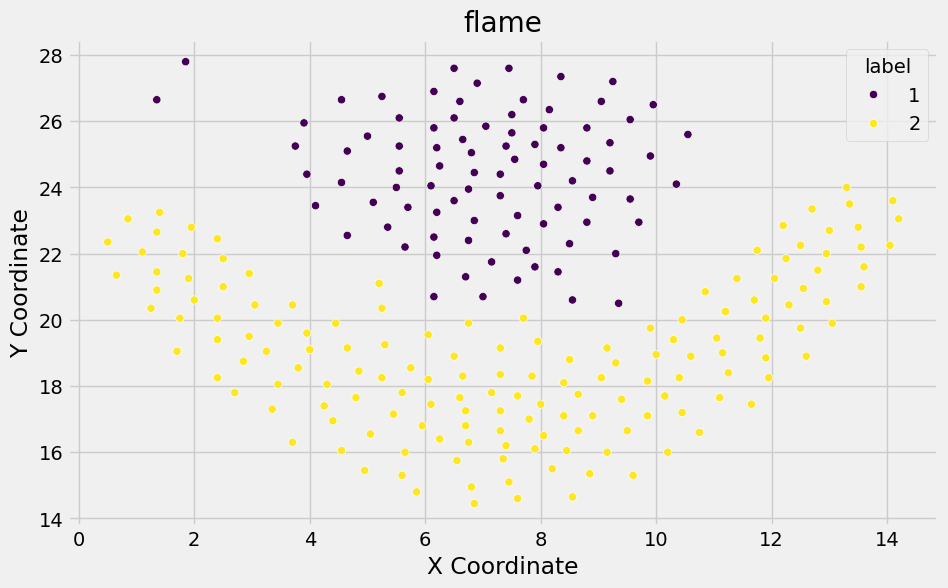

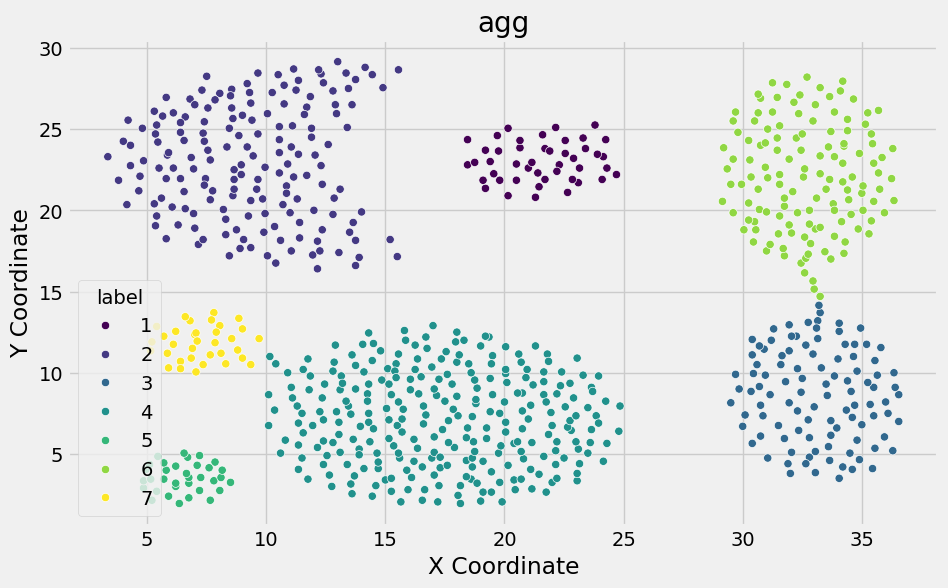

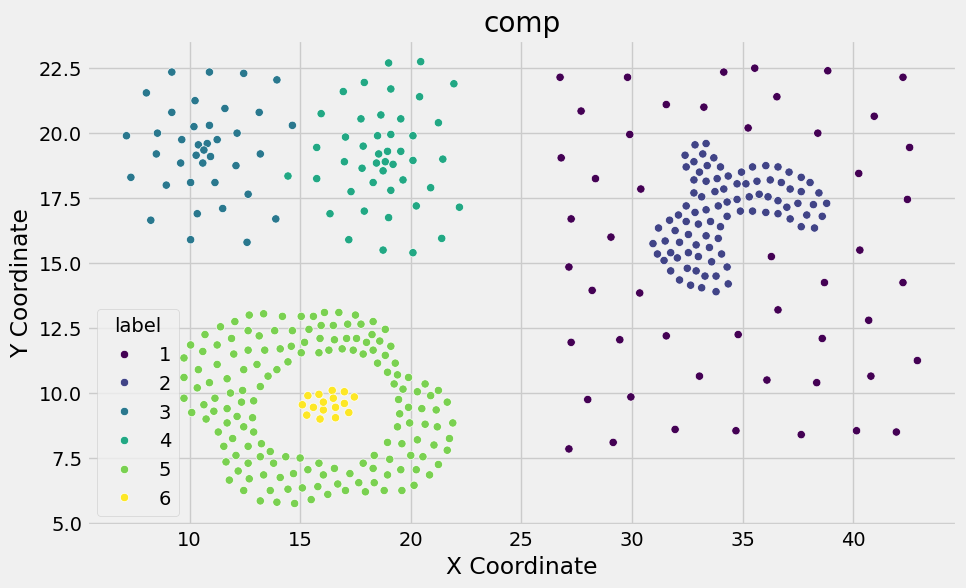

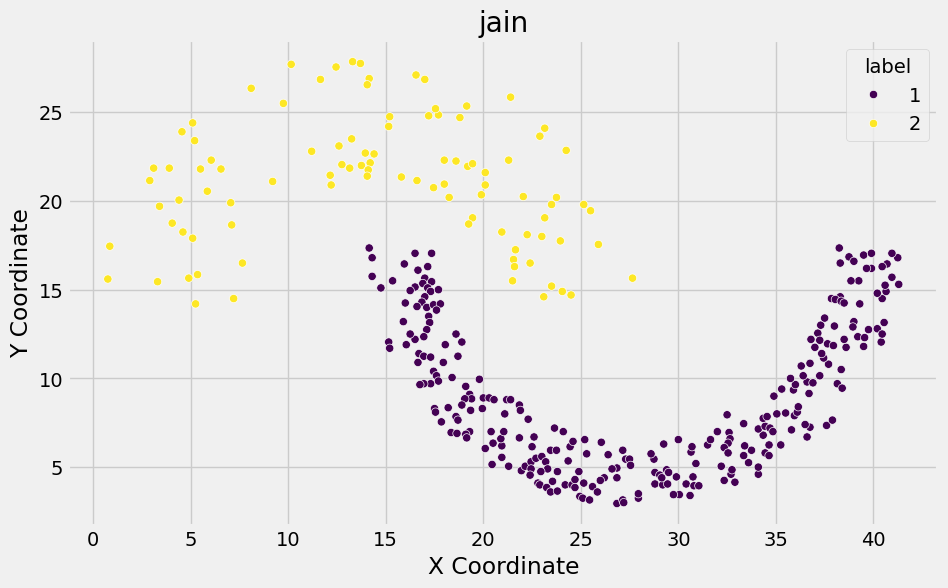

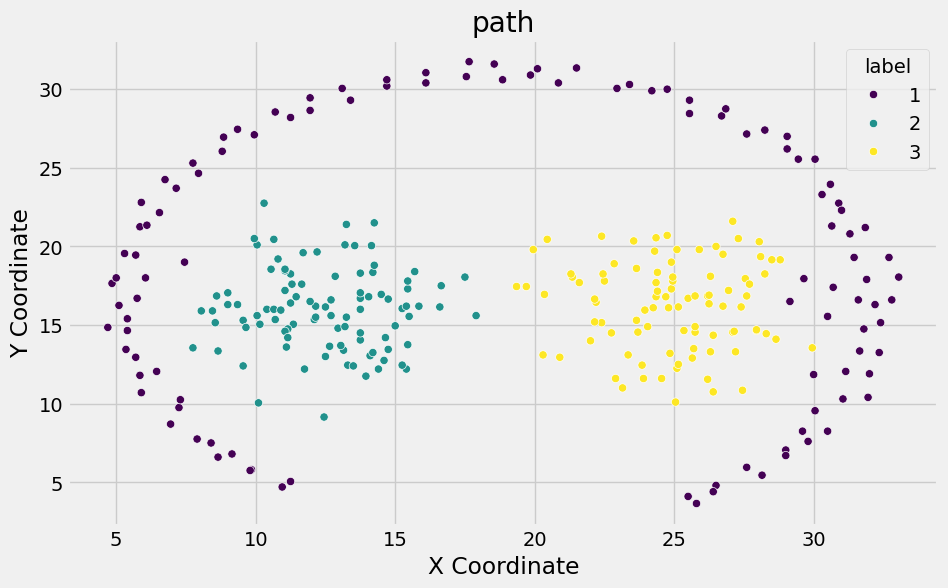

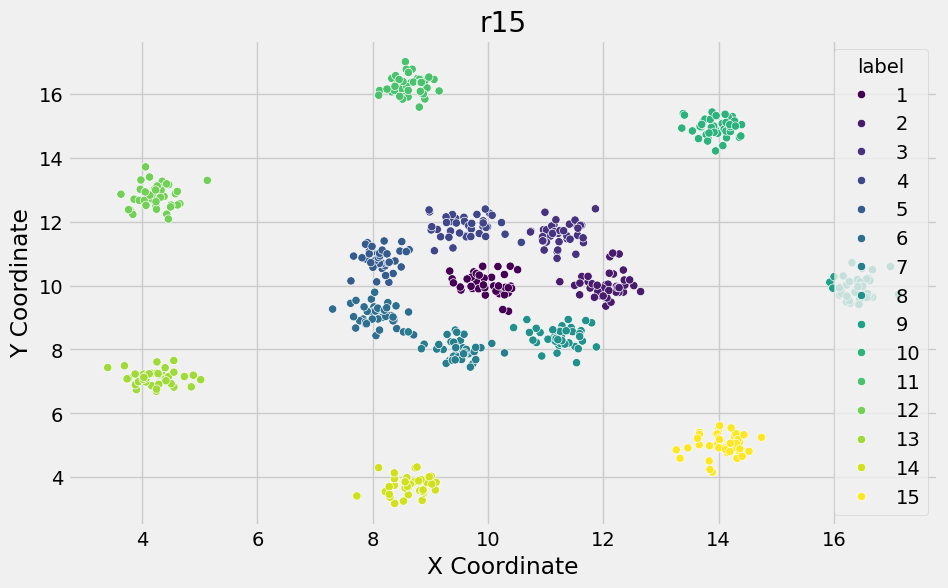

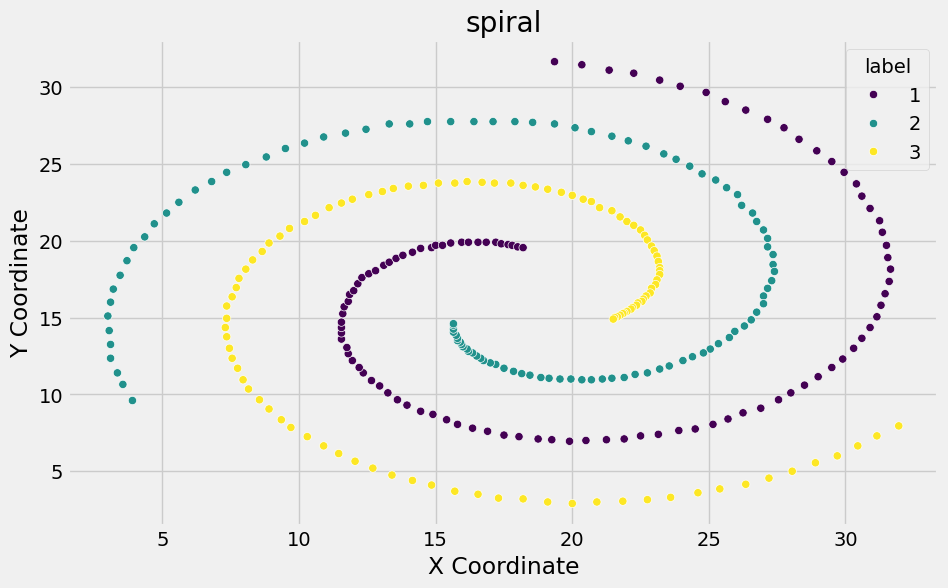

In [11]:
# Plot each data set with the true cluster labels.
[plot_clusters(df, name) for df, name in dfs];

---

### 3) Write a plotting function (or functions) to compare the performance of the three clustering algorithms.

Load in the three clustering algorithms we covered earlier in the class.

    K-means: k-means clustering.
    Agglomerative clustering: hierarchical clustering (bottom up).
    DBSCAN: density-based clustering.
    
Your function(s) should allow you to visually examine the effects of changing different parameters in the clustering algorithms. The parameters you should explore, at minimum, are:

    K-means:
        n_clusters
    Agglomerative clustering:
        n_clusters
    DBSCAN
        eps
        min_samples
        
Feel free to explore other parameters for these models.


In [12]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### But first: Let's write a function that scales our data for us.
Why do we need to scale our data for clustering algorithms? (thread)

In [14]:
# Write your function to scale data here.

def scale_matrix(X):
    """
    Scales the data matrix X so that each feature has mean 0 and standard deviation 1.
    Parameters:
    - X: A 2D numpy array where each column represents a feature.
    Returns:
    - A 2D numpy array where the data has been scaled.
    """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean[np.newaxis, :]) / std[np.newaxis, :]
    return X_scaled


In [23]:
# Write a function that will plot the results of the three
# clustering algorithms for comparison.

# Your function should take TWO INPUTS:
# 1 - The data
# 2 - The clusterer

# Your function should do TWO THINGS:
# 1 - Print the SILHOUETTE SCORE for your clusters
# 2 - Plot the clusteres with appropriate coloring

def plot_results(df, clusterer, title=""):
    """
    Scales the data, fits the clusterer, prints the silhouette score,
    and plots the clusters with appropriate coloring, including a title.
    
    Parameters:
    - df: DataFrame containing the 'x' and 'y' columns to cluster.
    - clusterer: An instance of a clustering algorithm from scikit-learn.
    - title: Title for the plot.
    """
    # Extract the features from the DataFrame
    X = df[['x', 'y']].values
    
    # Scale the data to have zero mean and unit variance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Fit the clusterer to the scaled data
    clusterer.fit(X_scaled)
    
    # Check if clusterer has 'labels_' attribute (DBSCAN might not if it fails to find clusters)
    if hasattr(clusterer, 'labels_'):
        labels = clusterer.labels_
    else:
        # Use a default label if not found
        labels = np.zeros(X.shape[0])
    
    # Calculate the silhouette score and print it
    # Check for a single cluster or no clusters case
    if len(set(labels)) > 1:
        silhouette = silhouette_score(X_scaled, labels)
        print(f"{title} Silhouette Score: {silhouette:.2f}")
    else:
        print(f"{title} Silhouette Score: Not applicable (single cluster or no clusters)")
    
    # Plot the clusters with appropriate coloring
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='viridis', legend='full', style=labels, s=60)
    plt.title(title)
    plt.xlabel('Scaled X')
    plt.ylabel('Scaled Y')
    plt.legend(title='Cluster')
    plt.show()


## 4) Tinkering with clustering parameters.

In the following sections, look at how the parameters affect the clustering algorithms and try to get clusters that make sense. There is no right answer here, as these are unsupervised techniques.

Don't forget to check out **silhouette scores!**

### 4.A) Find good parameters for the `flame` data set.

Which algorithm (visually) performs best?

 Silhouette Score: 0.37


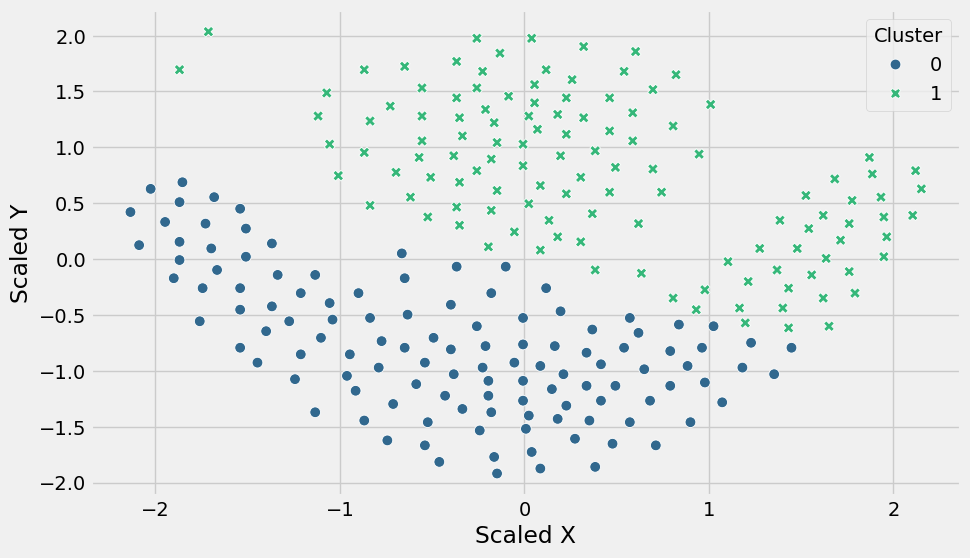

 Silhouette Score: 0.35


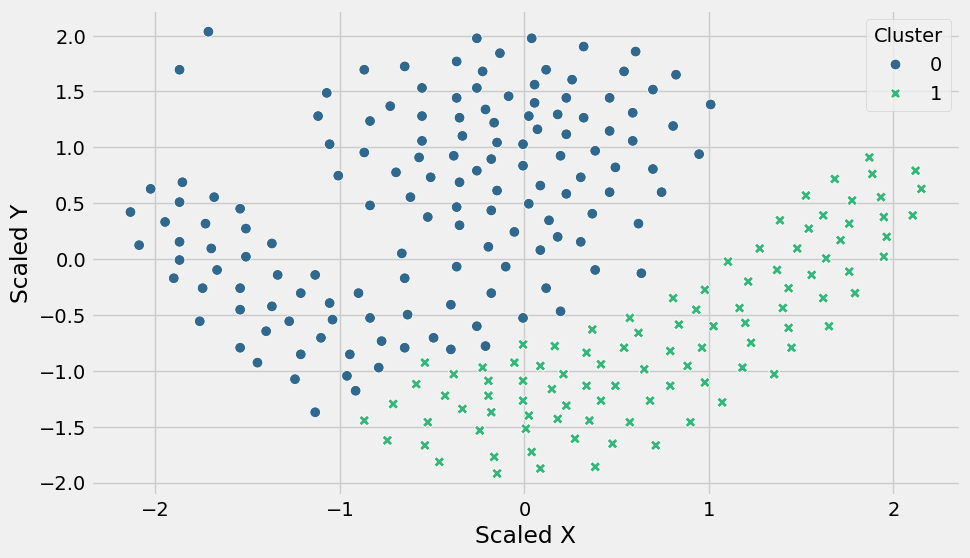

 Silhouette Score: 0.30


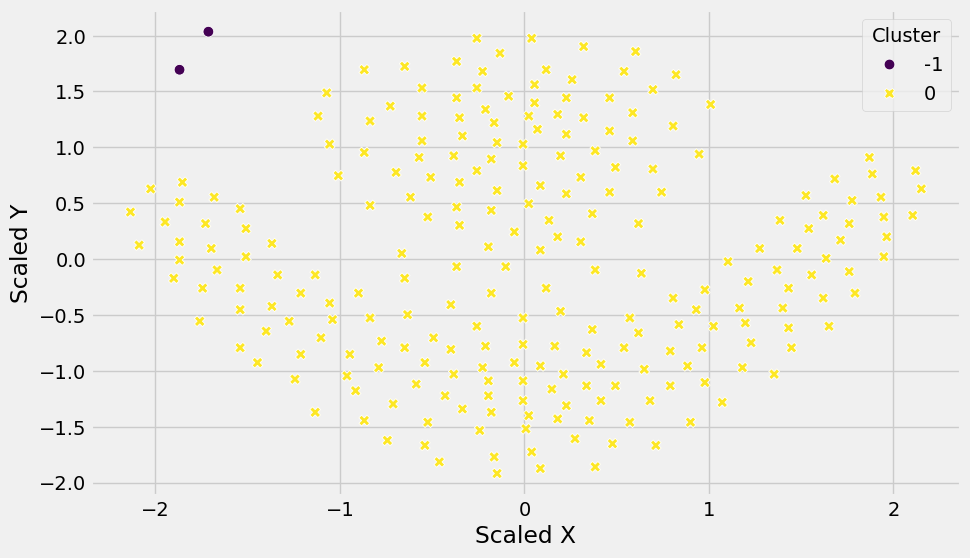

In [30]:
# A: K means cluster is better
kmeans_clusterer = KMeans(n_clusters=2, random_state=42)
plot_results(flame, kmeans_clusterer)

agg_clusterer = AgglomerativeClustering(n_clusters=2)
plot_results(flame, agg_clusterer)

dbscan_clusterer = DBSCAN(eps=0.5, min_samples=5)
plot_results(flame, dbscan_clusterer)

---

### 4.B) Find good parameters for the `agg` data set.

Which algorithm (visually) performs best?

 Silhouette Score: 0.43


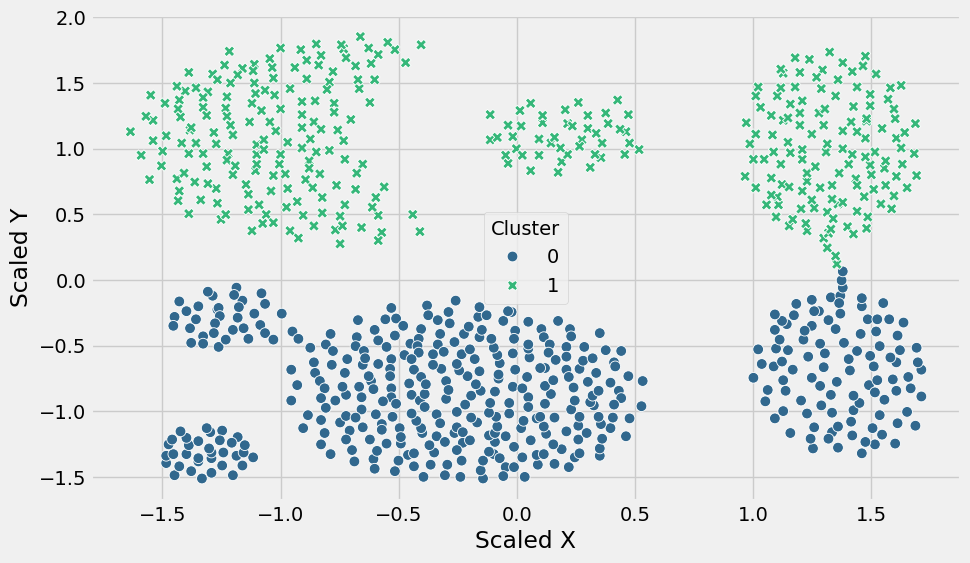

 Silhouette Score: 0.42


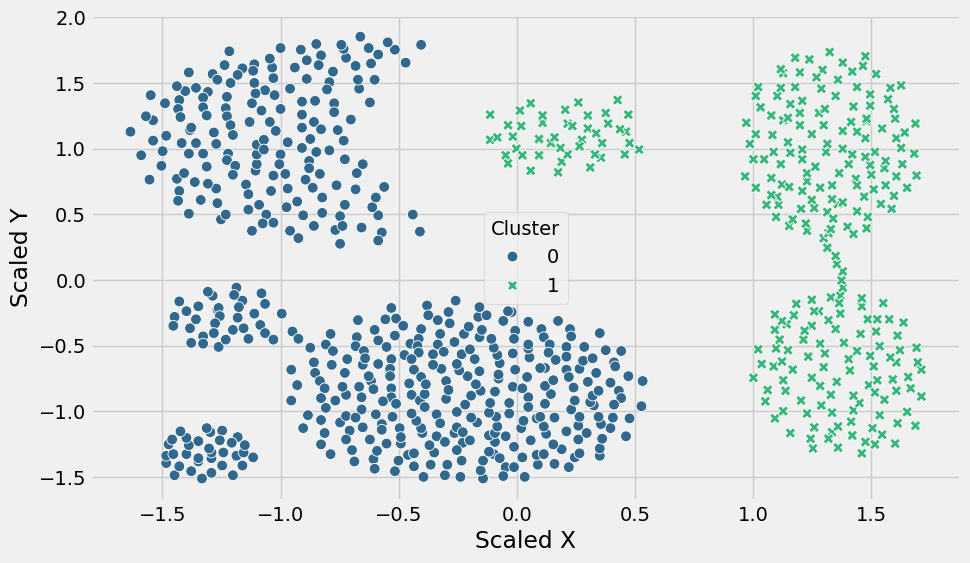

 Silhouette Score: Not applicable (single cluster or no clusters)


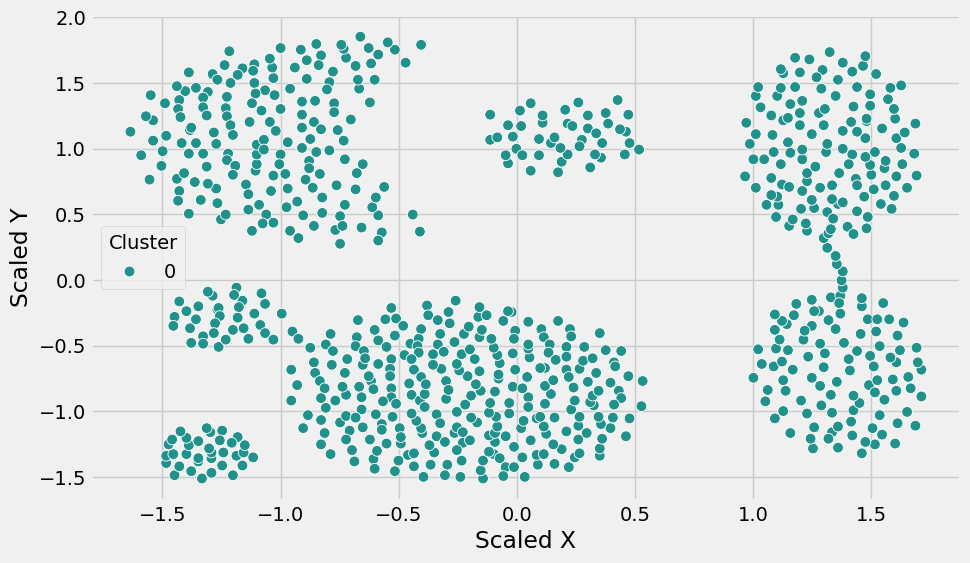

In [32]:
# A:
kmeans_clusterer = KMeans(n_clusters=2, random_state=42)
plot_results(agg, kmeans_clusterer)

agg_clusterer = AgglomerativeClustering(n_clusters=2)
plot_results(agg, agg_clusterer)

dbscan_clusterer = DBSCAN(eps=0.5, min_samples=5)
plot_results(agg, dbscan_clusterer)

---

### 4.C) Find good parameters for the `comp` data set.

Which algorithm (visually) performs best?

 Silhouette Score: 0.50


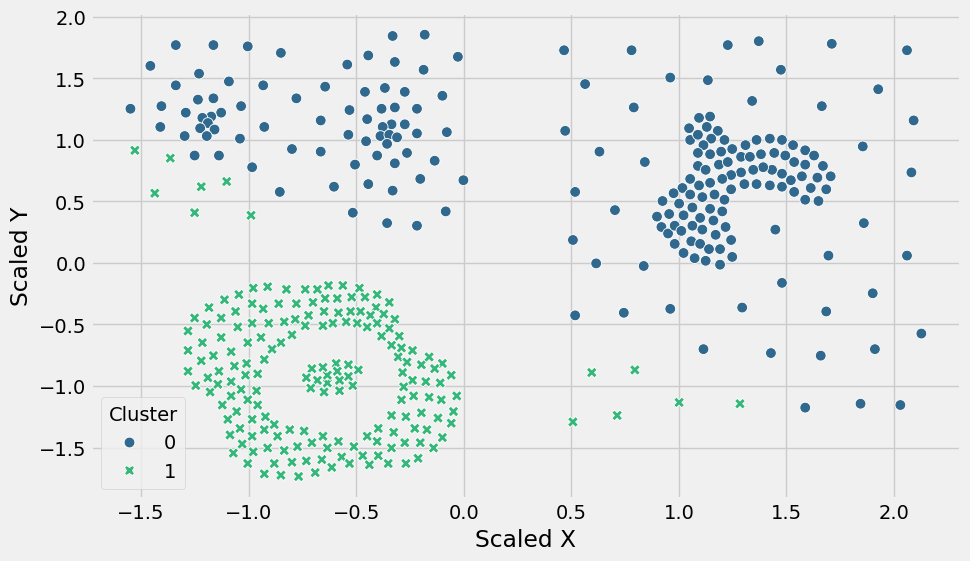

 Silhouette Score: 0.49


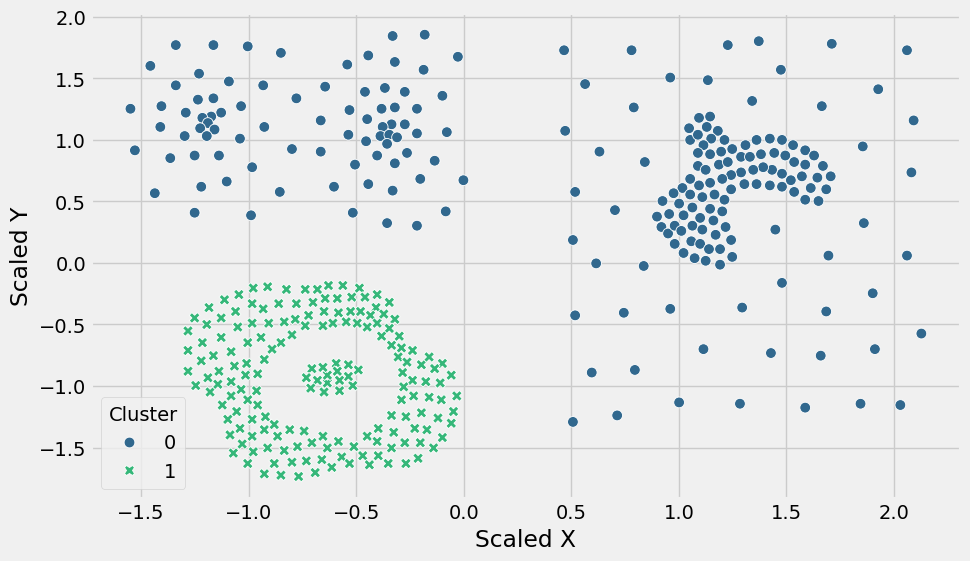

 Silhouette Score: Not applicable (single cluster or no clusters)


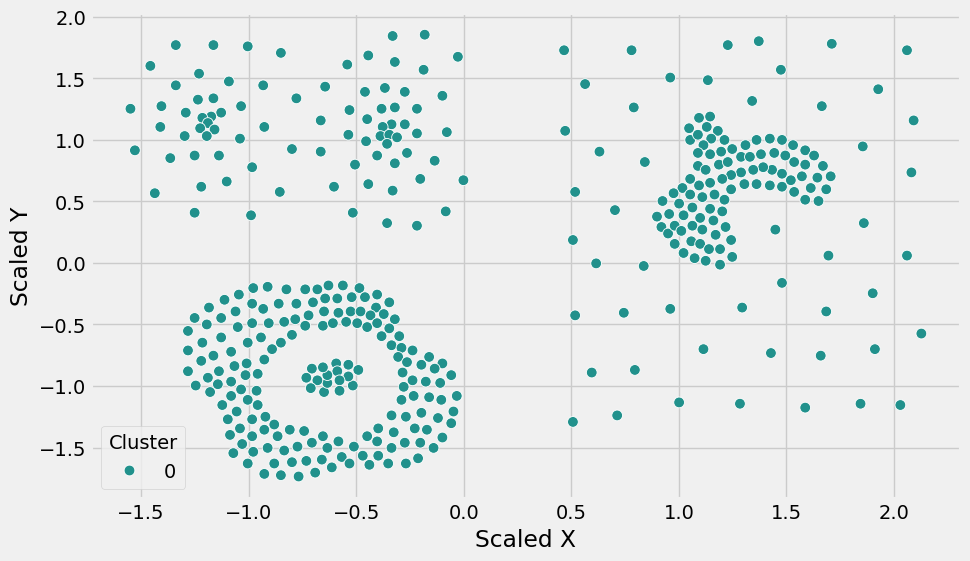

In [33]:
# A:
kmeans_clusterer = KMeans(n_clusters=2, random_state=42)
plot_results(comp, kmeans_clusterer)

agg_clusterer = AgglomerativeClustering(n_clusters=2)
plot_results(comp, agg_clusterer)

dbscan_clusterer = DBSCAN(eps=0.75, min_samples=5)
plot_results(comp, dbscan_clusterer)

---

### 4.D) Find good parameters for the `jain` data set.

Which algorithm (visually) performs best?

 Silhouette Score: 0.50


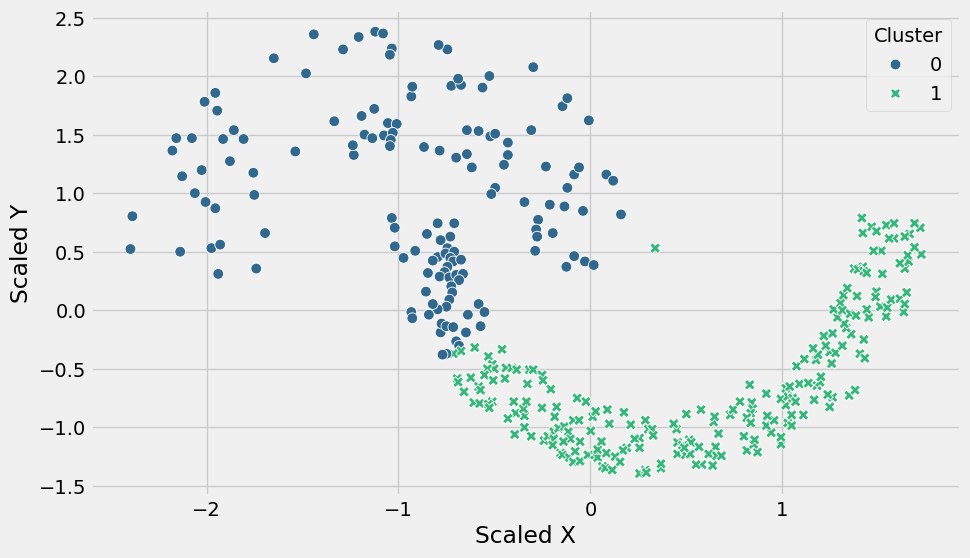

 Silhouette Score: 0.50


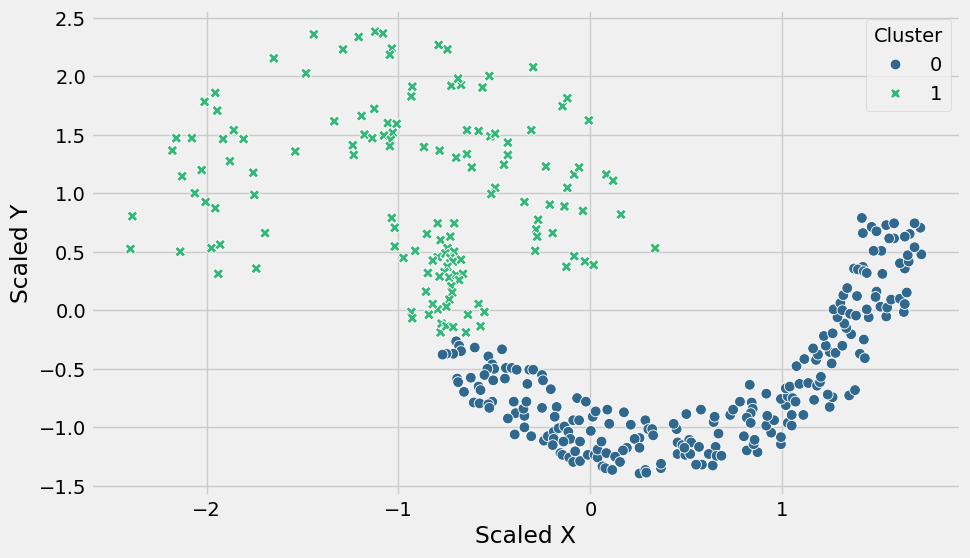

 Silhouette Score: Not applicable (single cluster or no clusters)


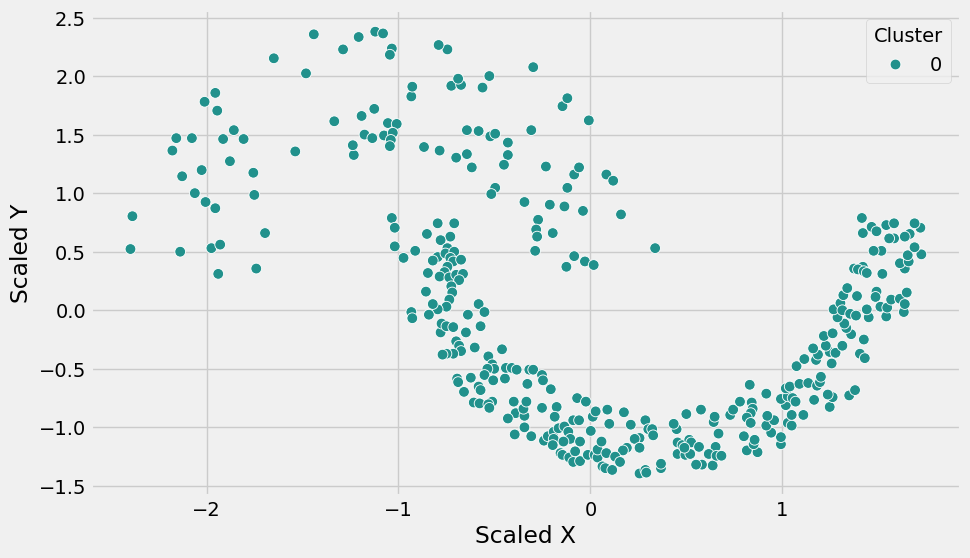

In [34]:
# A:
kmeans_clusterer = KMeans(n_clusters=2, random_state=42)
plot_results(jain, kmeans_clusterer)

agg_clusterer = AgglomerativeClustering(n_clusters=2)
plot_results(jain, agg_clusterer)

dbscan_clusterer = DBSCAN(eps=0.75, min_samples=5)
plot_results(jain, dbscan_clusterer)

---

### 4.E) Find good parameters for the `pathbased` data set.

Which algorithm (visually) performs best?

 Silhouette Score: 0.44


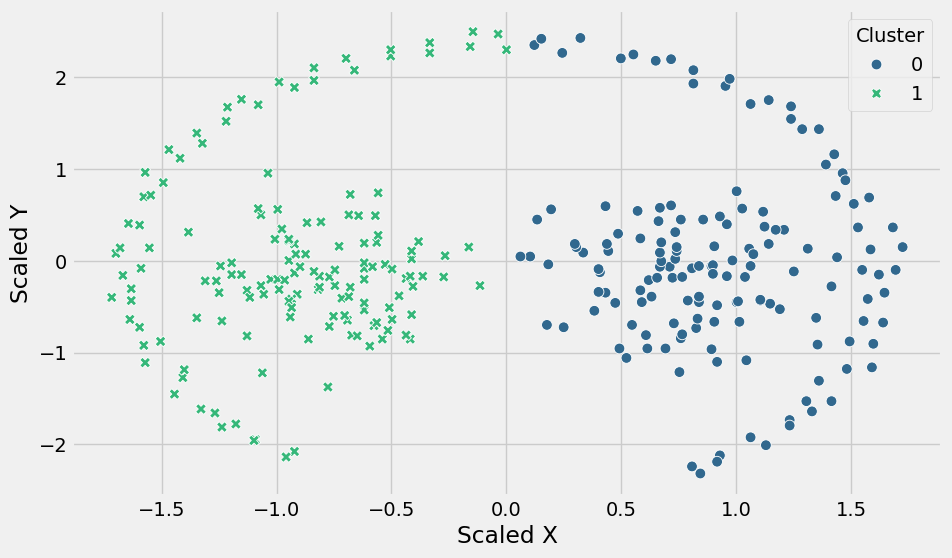

 Silhouette Score: 0.42


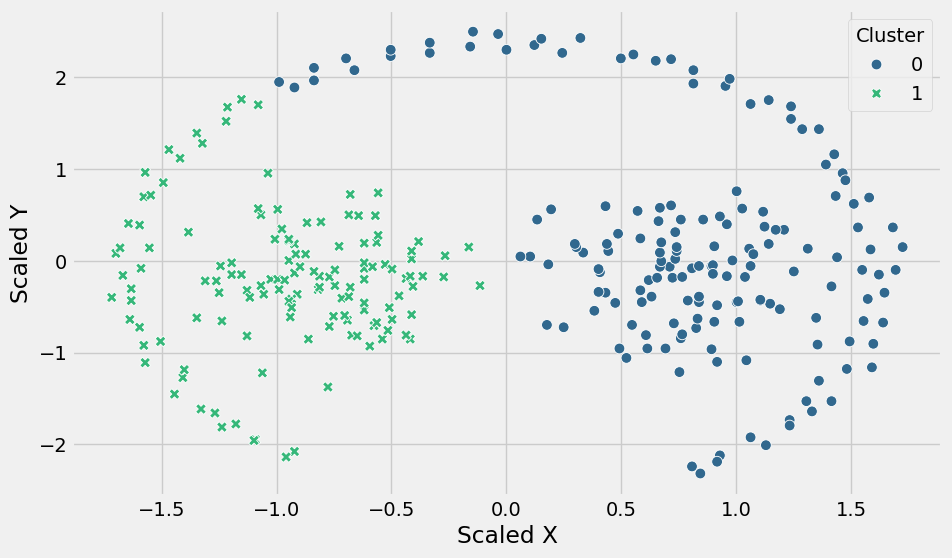

 Silhouette Score: Not applicable (single cluster or no clusters)


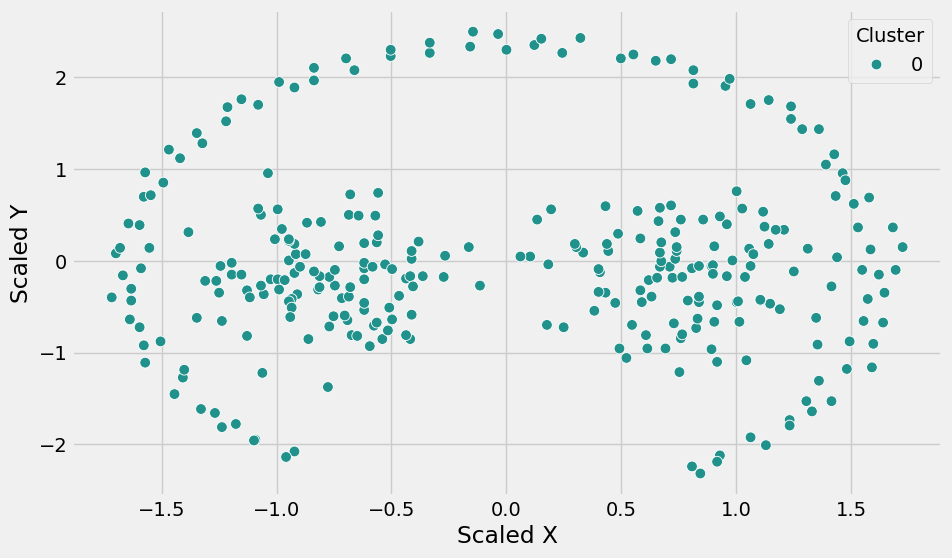

In [35]:
# A:
kmeans_clusterer = KMeans(n_clusters=2, random_state=42)
plot_results(path, kmeans_clusterer)

agg_clusterer = AgglomerativeClustering(n_clusters=2)
plot_results(path, agg_clusterer)

dbscan_clusterer = DBSCAN(eps=0.75, min_samples=5)
plot_results(path, dbscan_clusterer)

---

### 4.F) Find good parameters for the `r15` data set.

Which algorithm (visually) performs best?

 Silhouette Score: 0.30


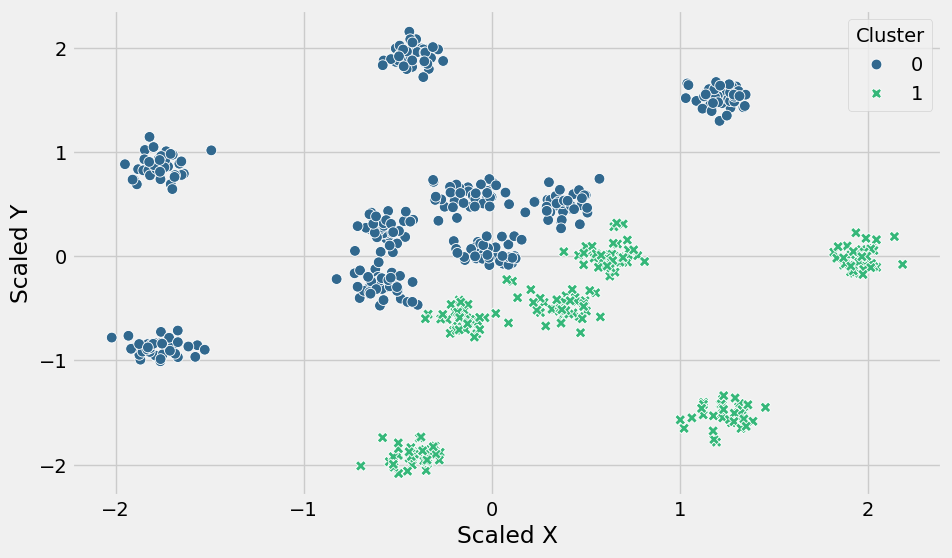

 Silhouette Score: 0.37


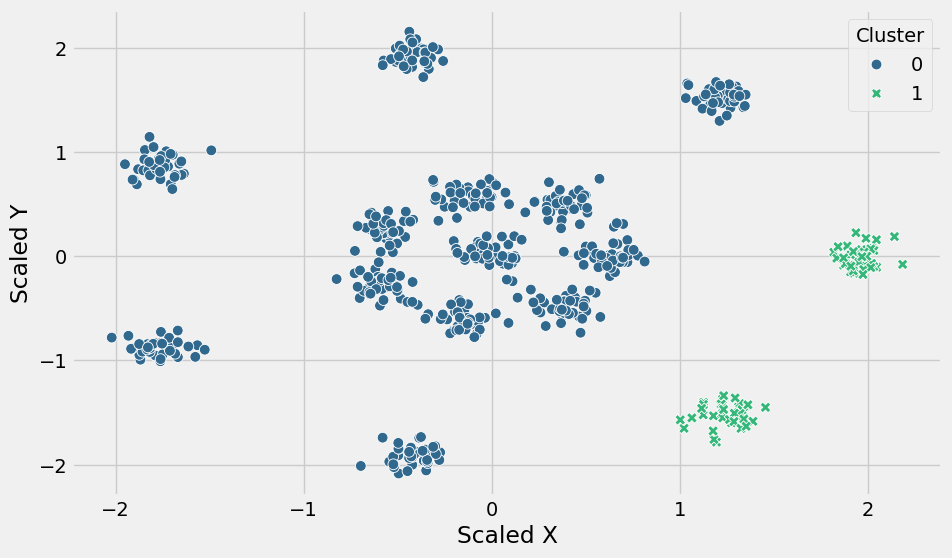

 Silhouette Score: 0.65


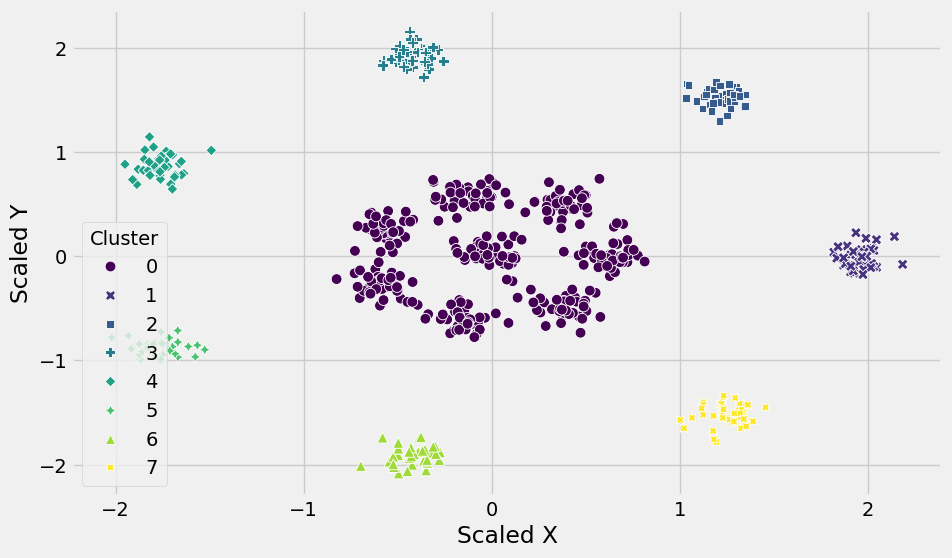

In [36]:
# A:
kmeans_clusterer = KMeans(n_clusters=2, random_state=42)
plot_results(r15, kmeans_clusterer)

agg_clusterer = AgglomerativeClustering(n_clusters=2)
plot_results(r15, agg_clusterer)

dbscan_clusterer = DBSCAN(eps=0.75, min_samples=5)
plot_results(r15, dbscan_clusterer)

---

### 4.G) Find good parameters for the `spiral` data set.

Which algorithm (visually) performs best?

 Silhouette Score: 0.33


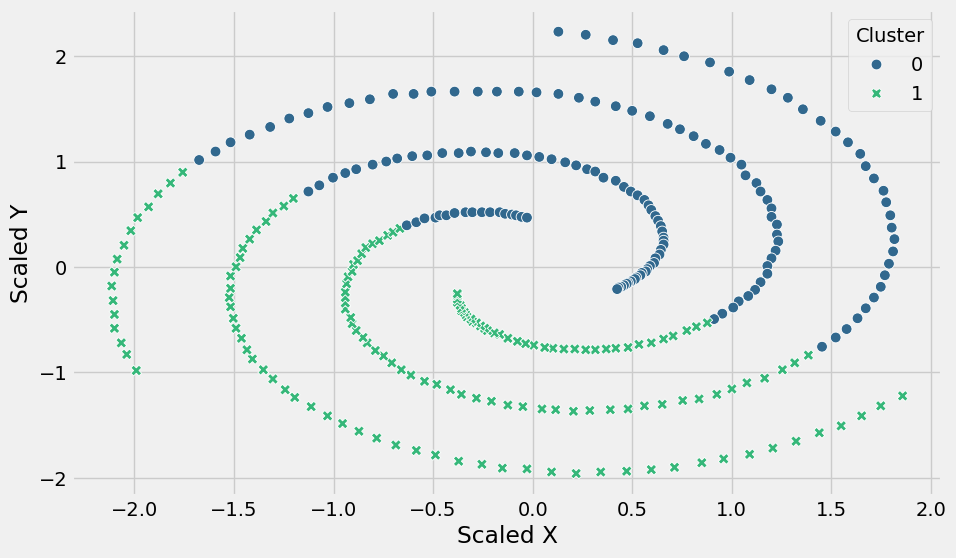

 Silhouette Score: 0.32


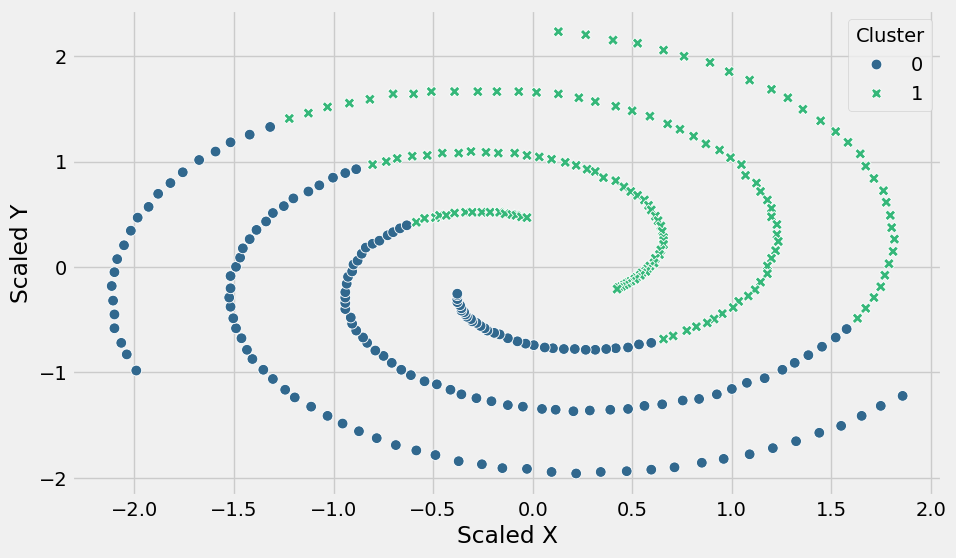

 Silhouette Score: Not applicable (single cluster or no clusters)


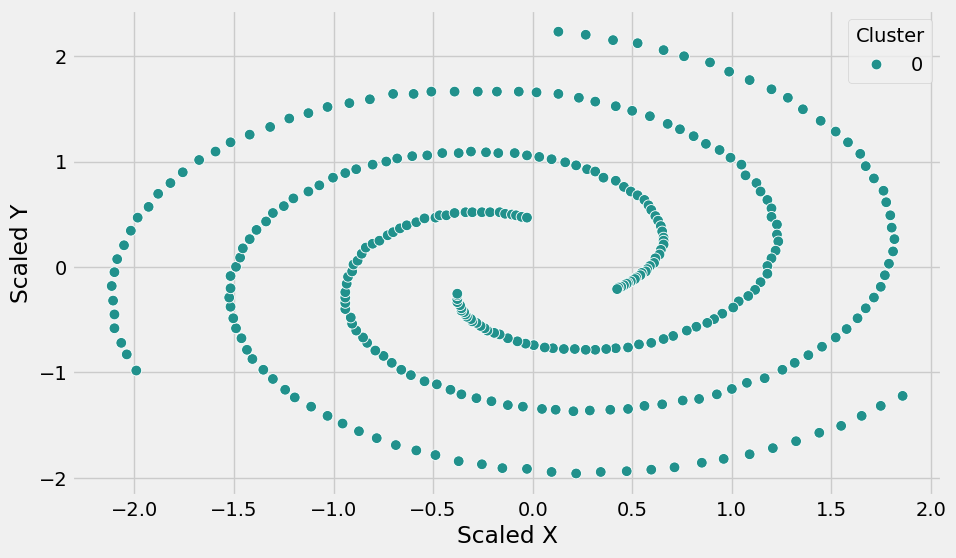

In [37]:
# A:
kmeans_clusterer = KMeans(n_clusters=2, random_state=42)
plot_results(spiral, kmeans_clusterer)

agg_clusterer = AgglomerativeClustering(n_clusters=2)
plot_results(spiral, agg_clusterer)

dbscan_clusterer = DBSCAN(eps=0.75, min_samples=5)
plot_results(spiral, dbscan_clusterer)

## 5) Melbourne Housing
Data come from [this](https://www.kaggle.com/anthonypino/melbourne-housing-market) Kaggle page.

In [38]:
mel = pd.read_csv('datasets/melbourne.csv')
mel.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

### 5a) Fix bad variable names
We're only going to look at three variables here, and two of them are spelled wrong! Change the lat/long column names to either be spelled correctly or abbrevited as `lat`/`long`. While we're add it, let's change `Price` --> `price`.

In [46]:
mel = mel.rename(columns={
    'Lattitude': 'lat',  # Abbreviating
    'Longtitude': 'long', # Abbreviating
    'Price': 'price'      # Changing to lowercase
})

mel.columns = [col.lower() for col in mel.columns]

mel.columns

Index(['suburb', 'address', 'rooms', 'type', 'price', 'method', 'sellerg',
       'date', 'distance', 'postcode', 'bedroom2', 'bathroom', 'car',
       'landsize', 'buildingarea', 'yearbuilt', 'councilarea', 'lat', 'long',
       'regionname', 'propertycount'],
      dtype='object')

### 5b) Drop missings
Drop all rows where either `lat`, `long`, or `price` is missing.

In [48]:
mel = mel.dropna(subset=['lat', 'long', 'price'])

### 5c) Plot lat vs long
What kind of clustering do you want to do?

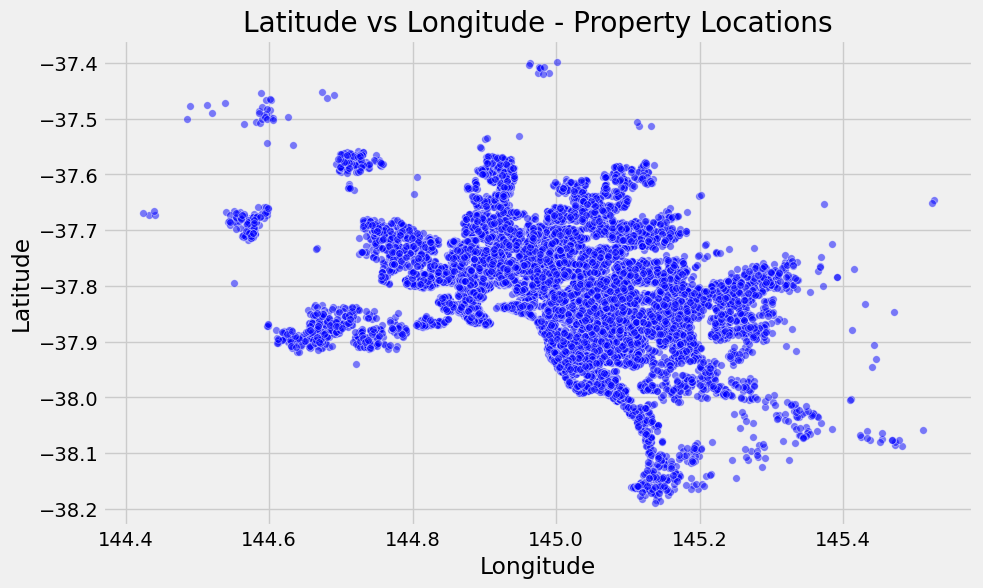

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(mel['long'], mel['lat'], alpha=0.5, c='blue', edgecolors='w', s=30)
plt.title('Latitude vs Longitude - Property Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

### 5d) Prepare X matrix by scaling
Why do we need to scale? (thread)

In [52]:
# 1. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(mel[['lat', 'long']])

### 5e) Cluster and plot clusters

In [56]:
# 2. DBSCAN Clustering
# After scaling, you might need to adjust 'eps'. Start with 0.5 which is a common default after scaling.
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Adding cluster labels to the original DataFrame for plotting
mel['cluster'] = clusters

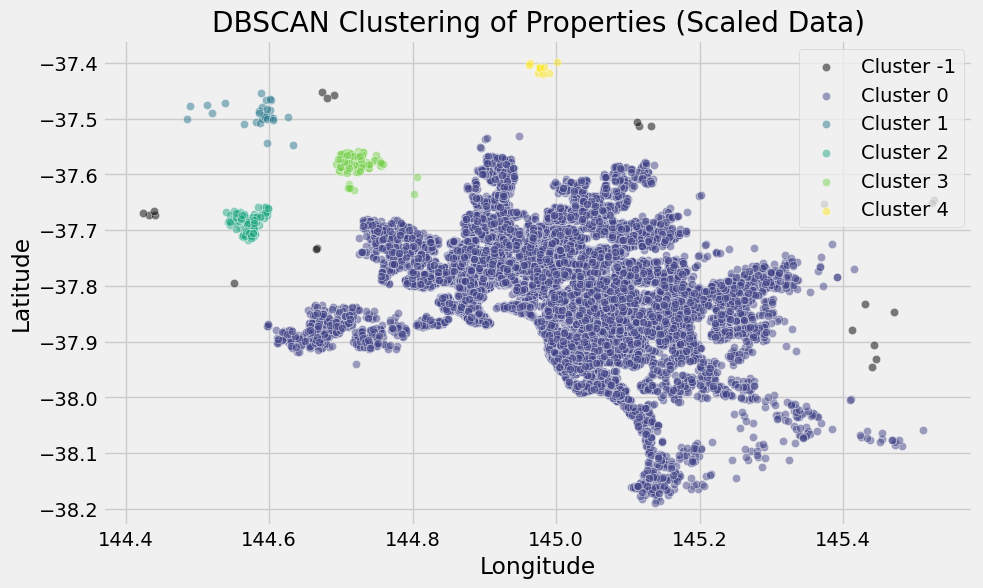

In [58]:
# 3. Plotting
plt.figure(figsize=(10, 6))
# Use a colormap to represent different clusters. Noise points are labeled with -1.
# We can map these to a separate color if we wish, e.g., black.
unique_clusters = np.unique(clusters)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

for cluster, color in zip(unique_clusters, colors):
    if cluster == -1:
        # Black used for noise.
        color = 'k'
    plt.scatter(mel.loc[mel['cluster'] == cluster, 'long'], mel.loc[mel['cluster'] == cluster, 'lat'], 
                c=[color], label=f'Cluster {cluster}', alpha=0.5, edgecolors='w')

plt.title('DBSCAN Clustering of Properties (Scaled Data)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

### 5f) Do prices differ by cluster?

cluster
 2    4.343720e+05
 4    4.837000e+05
 3    5.454899e+05
-1    6.482045e+05
 1    8.025357e+05
 0    1.098057e+06
Name: price, dtype: float64


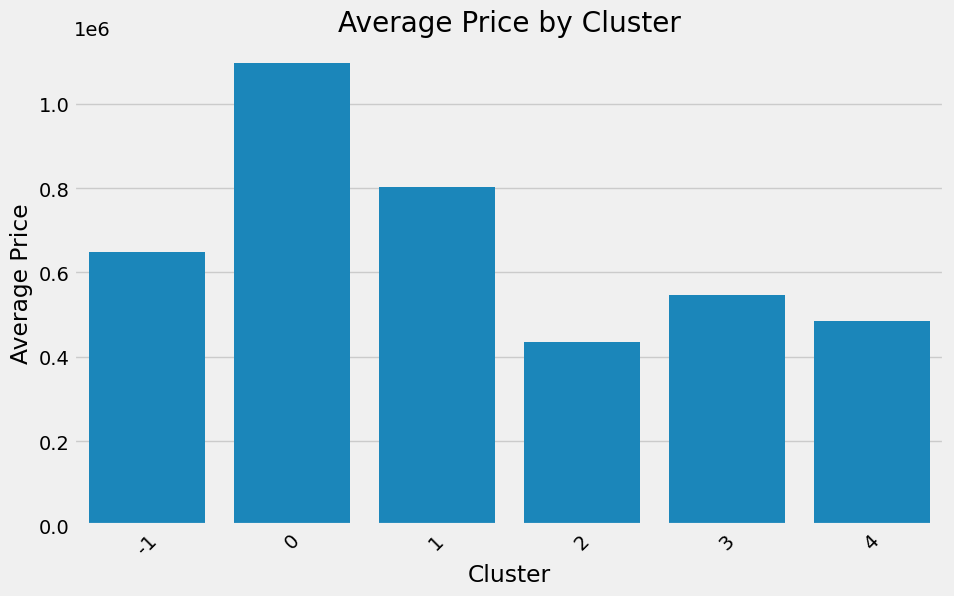

In [59]:
#maybe?

# Calculate the average price for each cluster
cluster_prices = mel.groupby('cluster')['price'].mean().sort_values()

# Print the average price for each cluster
print(cluster_prices)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_prices.index, y=cluster_prices.values)
plt.xlabel('Cluster')
plt.ylabel('Average Price')
plt.title('Average Price by Cluster')
plt.xticks(rotation=45)
plt.show()